在监督学习中，可以用预测值和原始值进行比较来计算模型的准确性，但是在无监督学习中，我们的数据没有标记      
度量聚类算法的一个好方法是观察集群被分离的离散程度。这些集群是不是被分离得很合理？一个集群中所有的数据点是不是足够紧密？
需要拟定一个指标来衡量这种特征，于是，我们采用一个被称为轮廓系数得分的指标。该得分是为每个数据点定义的，如下：     
得分=(x-y)/max(x,y)    
其中x表示在同一个集群中某个数据点与其他数据点的平均距离，y表示某个数据点与最近的另一个集群的所有点的平均距离

Number of clusters =  2
Silhouette score =  0.5290397175472954
Number of clusters =  3
Silhouette score =  0.5572466391184154
Number of clusters =  4
Silhouette score =  0.5832757517829593
Number of clusters =  5
Silhouette score =  0.6582796909760833
Number of clusters =  6
Silhouette score =  0.5991736976396735
Number of clusters =  7
Silhouette score =  0.5247875836889367
Number of clusters =  8
Silhouette score =  0.4509666780453714
Number of clusters =  9
Silhouette score =  0.4535778100609211


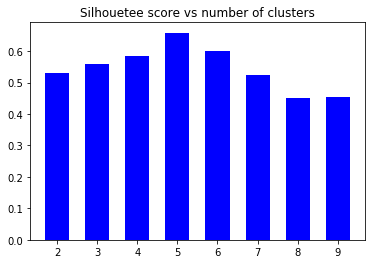

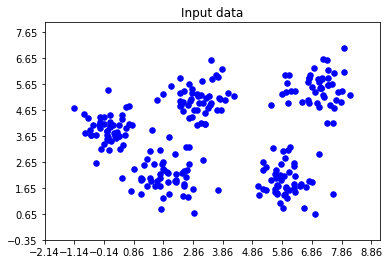

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans

def txt_read(filename,delim):
    x_data = []
    with open(filename,'r') as f:
        for line in f:
#             data = line.strip().split(delim)
            data = [float(x) for x in line.strip().split(delim)]
            x_data.append(data)

    x_data = np.array(x_data)
    return x_data


data = txt_read('data_perf.txt',',')

# 为了确定集群的最佳数量，我们迭代一系列的值，找出其中的峰值
scores = []
range_values = np.arange(2,10) #[2,10),步长为1

for i in range_values:
    kmeans = KMeans(init='k-means++',n_clusters=i,n_init=10)
    kmeans.fit(data)
    score = metrics.silhouette_score(data, kmeans.labels_, 
                metric='euclidean', sample_size=len(data))
    print('Number of clusters = ',i)
    print('Silhouette score = ',score)
    scores.append(score)
    

# 画出图形并找出峰值
plt.figure()
plt.bar(range_values,scores,width=0.6,color='b',align='center')
plt.title('Silhouetee score vs number of clusters')
plt.show()

# 画出数据
plt.figure()
plt.scatter(data[:,0],data[:,1],color='b',s=30)
x_min,x_max = min(data[:,0])-1,max(data[:,0])+1
y_min,y_max = min(data[:,1])-1,max(data[:,1])+1
plt.title('Input data')
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.xticks(np.arange(x_min,x_max,1))
plt.yticks(np.arange(y_min,y_max,1))
# plt.xticks(())
# plt.yticks(())
plt.show()

从条形图中可以看出，5个集群时最好的配置。通过轮廓系数判断聚类效果的方法，对那些不包含可视化的高位数据的大型数据集非常有用